In [ ]:
import math
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

In [ ]:
#Load data set 
file = "name.xlsx"
spreadsheet = pd.ExcelFile(file)
print(spreadsheet.sheet_names)
data = spreadsheet.parse("name")
data;

In [3]:
#Shuffle data
data = data.sample(frac=1)
data = data.T
data

,1496,358,854,87,623,131,707,1040,1462,1055,...,401,705,1550,79,1003,712,934,195,1565,845
5,5.000,4.00,6.00,7.000,6.00,4.00,6.00,8.00,2.000,6.00,...,4.00,6.00,2.000,2.000,6.00,6.00,6.00,4.00,5.000,6.00
114,85.000,246.00,150.00,121.000,135.00,163.00,235.00,102.00,155.000,85.00,...,85.00,114.00,113.000,140.000,62.00,165.00,61.00,85.00,91.000,147.00
0,0.000,1.00,0.00,0.000,0.00,1.00,0.00,1.00,0.000,1.00,...,1.00,0.00,0.000,0.000,1.00,0.00,1.00,1.00,0.000,0.00
78.6,77.700,61.50,72.40,88.400,72.40,60.30,72.40,65.20,77.800,65.10,...,62.40,72.40,77.700,88.400,65.20,72.40,65.20,60.30,77.700,72.40
172,172.000,167.00,168.00,172.000,168.00,167.00,168.00,172.00,172.000,172.00,...,167.00,168.00,172.000,172.000,172.00,168.00,172.00,167.00,172.000,168.00
75,75.000,26.00,61.00,75.000,60.00,26.00,60.00,32.00,75.000,32.00,...,26.00,60.00,75.000,75.000,32.00,60.00,32.00,26.00,75.000,61.00
0.1,0.000,2.00,0.00,0.000,0.00,2.00,0.00,0.00,0.000,0.00,...,0.00,0.00,0.000,0.000,0.00,0.00,1.00,2.00,0.000,0.00
0.2,0.000,4.00,4.00,2.000,0.00,2.00,0.00,2.00,4.000,0.00,...,0.00,2.00,4.000,4.000,0.00,4.00,0.00,4.00,0.000,4.00
0.3,0.000,0.00,0.00,0.000,50.00,0.00,0.00,45.00,0.000,30.00,...,0.00,0.00,0.000,0.000,45.00,0.00,80.00,0.00,0.000,0.00
0.4,0.000,0.00,0.00,0.000,2.00,0.00,0.00,1.00,0.000,3.00,...,0.00,0.00,0.000,0.000,1.00,0.00,2.00,0.00,0.000,0.00


In [4]:
X_train = data.iloc[1:, 0:1100]
Y_train = data.iloc[:1, 0:1100]
X_test = data.iloc[1:, 1101:1576]
Y_test = data.iloc[:1, 1101:1576]

In [6]:
def create_placeholders(n_x, n_y):
    """
    Create placeholders for X and Y to use later
    
    """
    
    X = tf.placeholder(tf.float32, [n_x, None], name = "X")
    Y = tf.placeholder(tf.float32, [n_y, None], name = "Y")
    
    return X, Y

In [7]:
def initialize_parameters():
    """
    Initialize parameters to build a deep neural network with 4 layers, each one with 30 units:
    W1 = [30, 16]
    b1 = [30, 1]
    W2 = [30, 30]
    b2 = [30, 1]
    W3 = [30, 30]
    b3 = [30, 1]
    W4 = [30, 30]
    b4 = [30, 1]
    W5 = [1, 30]
    b5 = [1, 1]
    """
    W1 = tf.get_variable("W1", [30, 16], initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1", [30, 1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [30, 30], initializer = tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable("b2", [30, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [30, 30], initializer = tf.contrib.layers.xavier_initializer())
    b3 = tf.get_variable("b3", [30, 1], initializer = tf.zeros_initializer())
    W4 = tf.get_variable("W4", [30, 30], initializer = tf.contrib.layers.xavier_initializer())
    b4 = tf.get_variable("b4", [30, 1], initializer = tf.zeros_initializer())
    W5 = tf.get_variable("W6", [1, 30], initializer = tf.contrib.layers.xavier_initializer())
    b5 = tf.get_variable("b6", [1, 1], initializer = tf.zeros_initializer())
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4,
                  "W5": W5,
                  "b5": b5}
    
    return parameters

In [8]:
def forward_propagation(X, parameters):
    """
    Implement forward propagation for themodel: LINEAR -> RELU x5 -> LINEAR
    
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    W4 = parameters["W4"]
    b4 = parameters["b4"]
    W5 = parameters["W5"]
    b5 = parameters["b5"]
    
    epsilon = 1e-3
    
    Z1 = tf.add(tf.matmul(W1, X), b1)
    Z1_norm = tf.layers.batch_normalization(Z1, axis = 0, momentum = 0.99, epsilon = epsilon, center = True, scale = True)
    A1 = tf.nn.relu(Z1_norm)
    Z2 = tf.add(tf.matmul(W2, A1), b2)
    Z2_norm = tf.layers.batch_normalization(Z2, axis = 0, momentum = 0.99, epsilon = epsilon, center = True, scale = True)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)
    Z3_norm = tf.layers.batch_normalization(Z3, axis = 0, momentum = 0.99, epsilon = epsilon, center = True, scale = True)
    A3 = tf.nn.relu(Z3_norm)
    Z4 = tf.add(tf.matmul(W4, A3), b4)
    Z4_norm = tf.layers.batch_normalization(Z4, axis = 0, momentum = 0.99, epsilon = epsilon, center = True, scale = True)
    A4 = tf.nn.relu(Z4_norm)
    Z5 = tf.add(tf.matmul(W5, A4), b5)

    return Z5

In [9]:
def compute_cost(Z5, Y):
    """
    Compute the cost
    
    """
    labels = Y
    predictions = Z5
    
    cost = tf.losses.huber_loss(labels = labels, predictions = predictions)
    
    return cost

In [10]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001, num_iters = 15000, print_cost = True):
    """
    Implement a four layer neural network: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> RELU -> LINEAR
    
    """
    
    ops.reset_default_graph()
    
    (n_x, m) = X_train.shape             # n_x: input size, m: number of examples in train set
    n_y = Y_train.shape[0]               # n_y: output size
        
    costs = []                           # To keep track of the cost
    
    
    # Create placeholders of shape (n_x, n_y)
    
    X, Y = create_placeholders(n_x, n_y)
    
    # Initialize parameters
    parameters = initialize_parameters()
    
    # Build the forward propagation
    Z5 = forward_propagation(X, parameters)
    
    # Compute the cost
    cost = compute_cost(Z5, Y)
    
    # Backpropagation with AdamOptimizer
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    # Initialize all the global variables
    init = tf.global_variables_initializer()
    
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for iters in range(num_iters):
            
            iter_cost = 0
            _, iter_cost = sess.run([optimizer, cost], feed_dict = {X: X_train, Y: Y_train})
            
            iter_cost += iter_cost/num_iters
    
        # Print the cost every epoch
            if print_cost == True and iters % 100 == 0:
                print("Cost after iteration %i: %f" % (iters, iter_cost))
            if print_cost == True and iters % 5 == 0:
                costs.append(iter_cost)
    # Plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel("cost")
        plt.xlabel("Iterations(per tens)")
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    
    # Save parameters in a variable
        parameters = sess.run(parameters)
        print("Parameters have been trained")
    
    #Calculate de correct prediction
    
        correct_prediction = np.abs(Y - Z5)
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        max_error = np.argmax(correct_prediction)
        
        print("Train error: ", accuracy.eval({X: X_train, Y: Y_train}))
        print("Test error: ", accuracy.eval({X: X_test, Y: Y_test}))
        print("Max error: ", np.amax(correct_prediction.eval({X: X_test, Y: Y_test})))
        print("Index: ", np.argmax(correct_prediction.eval({X: X_test, Y: Y_test})))
        
    return parameters

Cost after iteration 0: 34.989069
Cost after iteration 100: 10.289138
Cost after iteration 200: 0.992096
Cost after iteration 300: 0.560466
Cost after iteration 400: 0.450079
Cost after iteration 500: 0.412676
Cost after iteration 600: 0.394824
Cost after iteration 700: 0.383341
Cost after iteration 800: 0.375386
Cost after iteration 900: 0.370570
Cost after iteration 1000: 0.366524
Cost after iteration 1100: 0.363097
Cost after iteration 1200: 0.360269
Cost after iteration 1300: 0.357585
Cost after iteration 1400: 0.354891
Cost after iteration 1500: 0.352452
Cost after iteration 1600: 0.349839
Cost after iteration 1700: 0.347456
Cost after iteration 1800: 0.345038
Cost after iteration 1900: 0.342512
Cost after iteration 2000: 0.339751
Cost after iteration 2100: 0.336951
Cost after iteration 2200: 0.333999
Cost after iteration 2300: 0.330674
Cost after iteration 2400: 0.326563
Cost after iteration 2500: 0.322331
Cost after iteration 2600: 0.317579
Cost after iteration 2700: 0.312000
Co

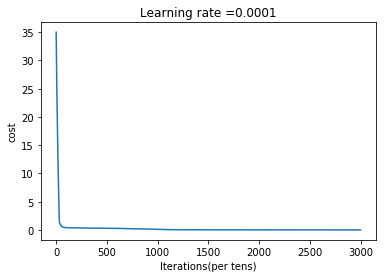

Parameters have been trained
Train error:  0.08161892
Test error:  0.16770983
Max error:  2.7564127
Index:  7


In [14]:
parameters = model(X_train, Y_train, X_test, Y_test)